### Intergenic and GREAT distance distributions
In this notebook, we plot the distributions of intergenic distances,    
the distances between consecutive syntenic transcription start sites,
for our 4 reference genomes.    
    
We similarly plot the distributions of GREAT distances, genomice regions    
assigned to each gene. For more details look into the "make_great_files" notebook

The intergenic and GREAT regions are computed in notebooks that are made    
available in the thesis appendix and repository.

In [1]:
# We load the precomputed distances
speciesorder = ['amphioxus','zebrafish','medaka','mouse']
intergenic_regions_D = {
"zebrafish" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Dre.tsv.gz",
"amphioxus" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Bla.tsv.gz",
"medaka" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Ola.tsv.gz",
"mouse" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Mmu.tsv.gz"}
great_regions_D = {
"zebrafish" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/GREAT_dre.bed.gz",
"amphioxus" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/GREAT_bla.bed.gz",
"medaka" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/GREAT_ola.bed.gz",
"mouse" : "/home/ska/panos/Thesis_shallow/data/genomic_regions/GREAT_mmu.bed.gz"}

In [2]:
def loadthing(k,v):
    df = pd.read_csv(v, sep='\t',header=None)
    df['w'] = df[2] - df[1]
    df['species'] = k
    return df[['species','w']].copy()    

In [3]:
big = pd.concat([loadthing(k,v) for k,v in intergenic_regions_D.items()])
big['w'] = big['w'].apply(lambda x: log(x,10))
gbig = pd.concat([loadthing(k,v) for k,v in great_regions_D.items()])
gbig['w'] = gbig['w'].apply(lambda x: log(x,10))

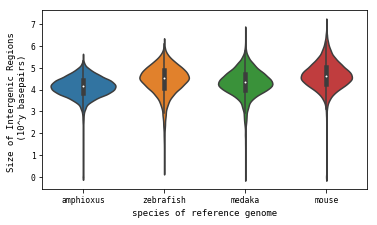

In [4]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.11, bottom=.13, right=.99, top=.99)
Fwidth = THESIS_PAGEWIDTH
Fheight = Fwidth*(9/16.)

sns.violinplot(data=big, x='species', order=speciesorder, y='w', ax=ax)

ax.set_ylabel('Size of Intergenic Regions \n (10^y basepairs)')
ax.set_xlabel('species of reference genome')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/tfigure_IntergenicSizes.pdf')

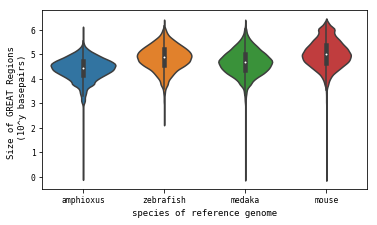

In [5]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.11, bottom=.13, right=.99, top=.99)

sns.violinplot(data=gbig, x='species', order=speciesorder, y='w', ax=ax)

ax.set_ylabel('Size of GREAT Regions \n (10^y basepairs)')
ax.set_xlabel('species of reference genome')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig("../Figures/from_notebooks/tfigure_GreatSizes.pdf")